En este cuaderno vamos a clasificar distintas plantas por su especie.
Los datos los hemos dscargado de kaggle, más concretamente de https://www.kaggle.com/competitions/plant-seedlings-classification/data?select=sample_submission.csv.

In [1]:
# Lo primero que hacemos es importar tensorflow
import tensorflow as tf
import tensorflow_hub as hub

print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)
physical_devices = tf.config.experimental.list_physical_devices('GPU')
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
if len(physical_devices) > 0:
   tf.config.experimental.set_memory_growth(physical_devices[0], True)
print("Gráfica: ", physical_devices)

TF version: 2.2.0
Hub version: 0.10.0
Gráfica:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
import os
TRAIN_DIR = 'plant-seedlings-classification/train'
print(os.listdir(TRAIN_DIR))

['Common Chickweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Maize', 'Black-grass', 'Charlock', 'Loose Silky-bent', 'Common wheat', 'Fat Hen', 'Scentless Mayweed', 'Sugar beet', 'Cleavers']


In [3]:
for seedling in os.listdir(TRAIN_DIR): 
    print(seedling, len(os.listdir(f'{TRAIN_DIR}/{seedling}')))

Common Chickweed 611
Shepherds Purse 231
Small-flowered Cranesbill 496
Maize 221
Black-grass 263
Charlock 390
Loose Silky-bent 654
Common wheat 221
Fat Hen 475
Scentless Mayweed 516
Sugar beet 385
Cleavers 287


In [4]:
seedling_len = {seedling: len(os.listdir(f'{TRAIN_DIR}/{seedling}')) for seedling in os.listdir(TRAIN_DIR)}

In [5]:
seedling_len

{'Common Chickweed': 611,
 'Shepherds Purse': 231,
 'Small-flowered Cranesbill': 496,
 'Maize': 221,
 'Black-grass': 263,
 'Charlock': 390,
 'Loose Silky-bent': 654,
 'Common wheat': 221,
 'Fat Hen': 475,
 'Scentless Mayweed': 516,
 'Sugar beet': 385,
 'Cleavers': 287}

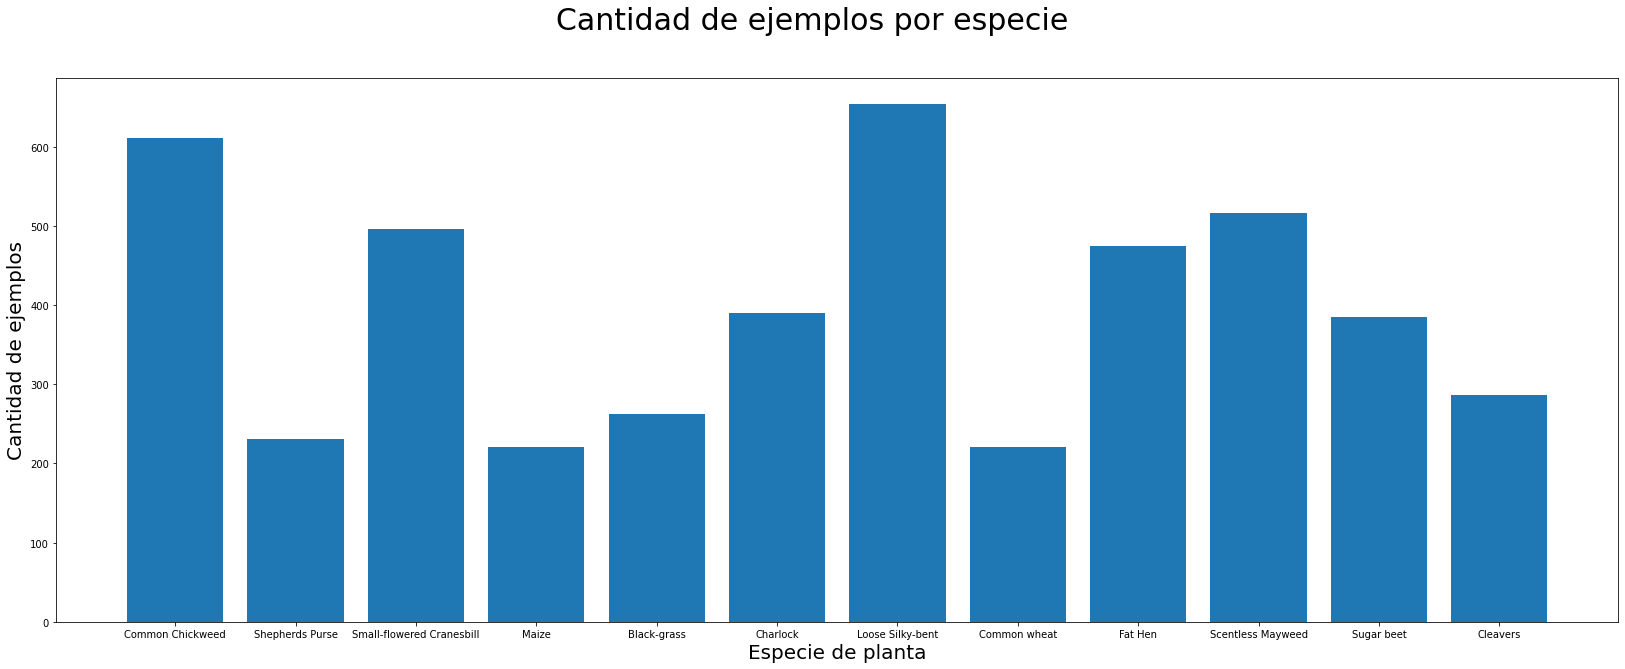

In [6]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(28, 10))
fig.suptitle('Cantidad de ejemplos por especie', fontsize=30)
plt.xlabel('Especie de planta', fontsize=20)
plt.ylabel('Cantidad de ejemplos', fontsize=20)
ax.bar(seedling_len.keys(), seedling_len.values())
plt.show()

In [7]:
sum(seedling_len.values())

4750

In [8]:
plant_from_seedling = [[f'{TRAIN_DIR}/{seedling}/{name}' for name in os.listdir(f'{TRAIN_DIR}/{seedling}')] for seedling in os.listdir(TRAIN_DIR)]
plants = [item for seedling in plant_from_seedling for item in seedling]
plants

['plant-seedlings-classification/train/Common Chickweed/feb7699d0.png',
 'plant-seedlings-classification/train/Common Chickweed/36f392b83.png',
 'plant-seedlings-classification/train/Common Chickweed/0f390ed98.png',
 'plant-seedlings-classification/train/Common Chickweed/2d131b7e6.png',
 'plant-seedlings-classification/train/Common Chickweed/d974f1537.png',
 'plant-seedlings-classification/train/Common Chickweed/04526c399.png',
 'plant-seedlings-classification/train/Common Chickweed/7b5ff3a68.png',
 'plant-seedlings-classification/train/Common Chickweed/f7b86986a.png',
 'plant-seedlings-classification/train/Common Chickweed/fe03224a0.png',
 'plant-seedlings-classification/train/Common Chickweed/520224ad0.png',
 'plant-seedlings-classification/train/Common Chickweed/1a4f7a1e1.png',
 'plant-seedlings-classification/train/Common Chickweed/c0b85294c.png',
 'plant-seedlings-classification/train/Common Chickweed/50659ebe2.png',
 'plant-seedlings-classification/train/Common Chickweed/28285eb9

In [9]:
len(plants)

4750

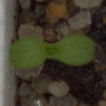

In [10]:
from IPython.display import display, Image
Image(plants[4000])

In [11]:
import numpy as np
labels = np.array([plant.split('/')[2] for plant in plants])
labels

array(['Common Chickweed', 'Common Chickweed', 'Common Chickweed', ...,
       'Cleavers', 'Cleavers', 'Cleavers'], dtype='<U25')

In [12]:
print(len(os.listdir('my_dataset/train')), len(labels))

12 4750


In [13]:
unique_seedlings = np.unique(labels)

In [14]:
unique_seedlings

array(['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed',
       'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize',
       'Scentless Mayweed', 'Shepherds Purse',
       'Small-flowered Cranesbill', 'Sugar beet'], dtype='<U25')

In [15]:
labels[0] == unique_seedlings

array([False, False, False,  True, False, False, False, False, False,
       False, False, False])

In [16]:
labels[1] == unique_seedlings

array([False, False, False,  True, False, False, False, False, False,
       False, False, False])

In [17]:
boolean_labels = [label == unique_seedlings for label in labels]

In [18]:
boolean_labels

[array([False, False, False,  True, False, False, False, False, False,
        False, False, False]),
 array([False, False, False,  True, False, False, False, False, False,
        False, False, False]),
 array([False, False, False,  True, False, False, False, False, False,
        False, False, False]),
 array([False, False, False,  True, False, False, False, False, False,
        False, False, False]),
 array([False, False, False,  True, False, False, False, False, False,
        False, False, False]),
 array([False, False, False,  True, False, False, False, False, False,
        False, False, False]),
 array([False, False, False,  True, False, False, False, False, False,
        False, False, False]),
 array([False, False, False,  True, False, False, False, False, False,
        False, False, False]),
 array([False, False, False,  True, False, False, False, False, False,
        False, False, False]),
 array([False, False, False,  True, False, False, False, False, False,
        Fal

In [19]:
boolean_labels[0].argmax()

3

In [20]:
# Simplemente comprobamos que, efectivamente, son 12 arrays distintas.
positions = [label.argmax() for label in boolean_labels]
positions

[3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,


In [21]:
len(set(positions)), len(boolean_labels)

(12, 4750)

In [22]:
len(plants)

4750

## Creación de un set de validación
A partir de aquí crearemos un set de validación para nuestros datos.

In [23]:
# Setup variables X e y
X = plants
y = boolean_labels

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

(3800, 3800, 950, 950)

In [25]:
len(X), len(boolean_labels)

(4750, 4750)

In [26]:
X_train[:5], y_train[:2]

(['plant-seedlings-classification/train/Common wheat/cb0bc5c02.png',
  'plant-seedlings-classification/train/Loose Silky-bent/482a936fc.png',
  'plant-seedlings-classification/train/Maize/7389aea72.png',
  'plant-seedlings-classification/train/Sugar beet/3112fb5d7.png',
  'plant-seedlings-classification/train/Loose Silky-bent/1b4404d36.png'],
 [array([False, False, False, False,  True, False, False, False, False,
         False, False, False]),
  array([False, False, False, False, False, False,  True, False, False,
         False, False, False])])

## Preprocesado de imágenes
En esta parte vamos a pasar nuestras imágenes a tensores

In [27]:
# Convertir imagen a NumPy array
from matplotlib.pyplot import imread
image = imread(plants[42])
image.shape

(150, 150, 3)

In [28]:
# Ahora la pasamos a Tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 150, 3), dtype=float32, numpy=
array([[[0.21176471, 0.14509805, 0.10196079],
        [0.22745098, 0.15294118, 0.10588235],
        [0.23921569, 0.16470589, 0.11372549],
        [0.27450982, 0.20392157, 0.15686275],
        [0.3254902 , 0.26666668, 0.22352941],
        [0.34117648, 0.2784314 , 0.22745098],
        [0.38039216, 0.3137255 , 0.2627451 ],
        [0.35686275, 0.28235295, 0.23137255],
        [0.34901962, 0.2784314 , 0.22352941],
        [0.35686275, 0.2901961 , 0.23529412],
        [0.38039216, 0.31764707, 0.26666668],
        [0.39215687, 0.3372549 , 0.28627452],
        [0.39215687, 0.34901962, 0.29411766],
        [0.44705883, 0.4117647 , 0.3647059 ],
        [0.41960785, 0.3764706 , 0.32941177],
        [0.41568628, 0.35686275, 0.3137255 ],
        [0.4       , 0.32941177, 0.28627452],
        [0.38431373, 0.30980393, 0.2627451 ],
        [0.38039216, 0.30980393, 0.25882354],
        [0.39607844, 0.32941177, 0.2784314 ],
        [0.39607844, 0.3333

Ahora vamos a hacer una función para pasar las imágenes a tensor

In [29]:
IMG_SIZE = 224

def process_image(image_path):
  """
  Toma la ruta de la imagen y la pasa a tensor
  """
  # Lee la imagen
  image = tf.io.read_file(image_path)
  # Pasa la imagen png a tensor con 3 canales (RGB)
  image = tf.image.decode_png(image, channels=3)
  # Convierte los valores de 0-255 a 0-1
  image = tf.image.convert_image_dtype(image, tf.float32)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
  return image

In [30]:
process_image(plants[42])

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.21176472, 0.14509805, 0.10196079],
        [0.21967788, 0.14905463, 0.10393909],
        [0.22949931, 0.1549895 , 0.10724791],
        ...,
        [0.3312851 , 0.27382708, 0.24177176],
        [0.33916327, 0.27839643, 0.2489672 ],
        [0.34509805, 0.28235295, 0.25490198]],

       [[0.20582984, 0.13718489, 0.09602591],
        [0.213743  , 0.14313741, 0.09900219],
        [0.22390887, 0.15172179, 0.1039802 ],
        ...,
        [0.33197394, 0.28010637, 0.2444389 ],
        [0.3372026 , 0.28237066, 0.24898483],
        [0.34114146, 0.28433123, 0.2529237 ]],

       [[0.20341389, 0.13350841, 0.09497549],
        [0.21029374, 0.14038827, 0.09789877],
        [0.21978293, 0.15067911, 0.10350141],
        ...,
        [0.33253172, 0.28888676, 0.24830551],
        [0.33493832, 0.28832892, 0.249691  ],
        [0.33657214, 0.28764006, 0.2509804 ]],

       ...,

       [[0.23461138, 0.18363097, 0.13725491],
        [0.23

## Crear batches de datos

In [31]:
# Creamos una función simple que devuelva una tupla(imagen, etiqueta)
def get_image_label(image_path, label):
  image = process_image(image_path)
  return image, label

In [32]:
# Definimos el tamaño del batch
BATCH_SIZE = 32

# Esta función pasa nuestros datos a batches
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):

  # Si es de test, no tenemos etiquetas
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepaths
    data_batch = data.map(process_image).batch(batch_size)
    return data_batch
  
  # Si son datos de validación, no hace falta barajarlos.
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(batch_size)
    return data_batch

  else:
    # Si son datos de entrenamiento, los barajamos
    print("Creating training data batches...")
    # Pasamos todo a tensores
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                              tf.constant(y))) # labels
    
    data = data.shuffle(buffer_size=len(x))
    data = data.map(get_image_label)
    data_batch = data.batch(batch_size)
  return data_batch

In [33]:
# Creamos los batches de entrenamiento y validación
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


## Visualización de batches

In [34]:
import matplotlib.pyplot as plt

def show_25_images(images, labels):
  """
  Muestra 25 imágenes de un batch
  """
  plt.figure(figsize=(10, 10))
  for i in range(25):
    ax = plt.subplot(5, 5, i+1)
    plt.imshow(images[i])
    plt.title(unique_seedlings[labels[i].argmax()])
    plt.axis("off")

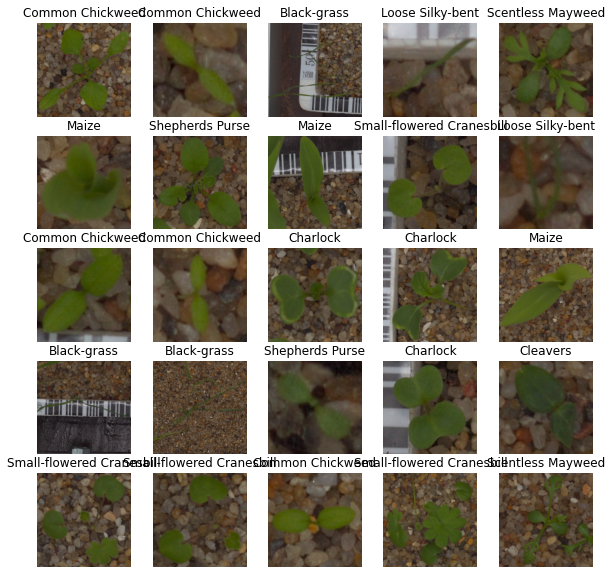

In [35]:
# Visualize training images from the training data batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

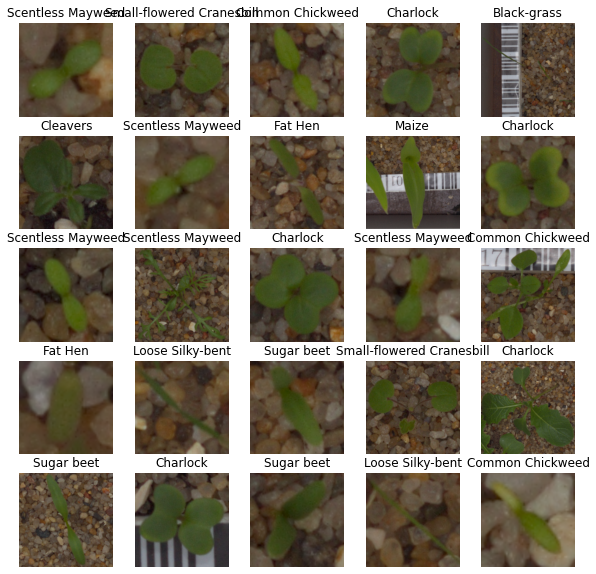

In [36]:
# Visualize validation images from the validation data batch
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

## Crear y entrenar el modelo

In [37]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of the model
OUTPUT_SHAPE = len(unique_seedlings) # number of unique labels

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [38]:
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
    tf.keras.layers.Dense(units=OUTPUT_SHAPE, 
                          activation="softmax") # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(), # Our model wants to reduce this (how wrong its guesses are)
      optimizer=tf.keras.optimizers.Adam(), # A friend telling our model how to improve its guesses
      metrics=["accuracy"] # We'd like this to go up
  )

  # Build the model
  model.build(INPUT_SHAPE) # Let the model know what kind of inputs it'll be getting
  
  return model

In [39]:
# Create a model and check its details
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     multiple                  5432713   
_________________________________________________________________
dense (Dense)                multiple                  12024     
Total params: 5,444,737
Trainable params: 12,024
Non-trainable params: 5,432,713
_________________________________________________________________


In [40]:
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("drive/My Drive/Data/logs",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

In [41]:
# Create early stopping (once our model stops improving, stop training)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3) # stops after 3 rounds of no improvements

In [42]:
# How many rounds should we get the model to look through the data?
NUM_EPOCHS = 8 #@param {type:"slider", min:10, max:100, step:10}

In [43]:
# Build a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  H = model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1, # check validation metrics every epoch
            callbacks=[tensorboard, early_stopping])
  
  return model, H

In [44]:
model, H = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/8
119/119 [==============================] - 42s 355ms/step - loss: 1.4560 - accuracy: 0.5382 - val_loss: 0.8953 - val_accuracy: 0.7032
Epoch 2/8
119/119 [==============================] - 39s 324ms/step - loss: 0.7619 - accuracy: 0.7468 - val_loss: 0.6661 - val_accuracy: 0.7863
Epoch 3/8
119/119 [==============================] - 38s 321ms/step - loss: 0.6031 - accuracy: 0.8021 - val_loss: 0.6234 - val_accuracy: 0.7989
Epoch 4/8
119/119 [==============================] - 38s 323ms/step - loss: 0.5172 - accuracy: 0.8318 - val_loss: 0.5816 - val_accuracy: 0.8158
Epoch 5/8
119/119 [==============================] - 39s 329ms/step - loss: 0.4635 - accuracy: 0.8532 - val_loss: 0.5223 - val_accuracy: 0.8389
Epoch 6/8
119/119 [==============================] - 40s 338ms/step - loss: 0.4185 - accuracy: 0.8647 - val_loss: 0.5174 - val_accuracy: 0.8368
Epoch 7/8
119/119 [========================

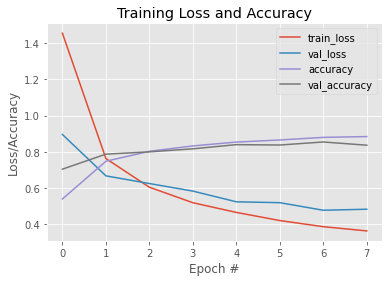

In [45]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 8), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 8), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 8), H.history["accuracy"], label="accuracy")
plt.plot(np.arange(0, 8), H.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [46]:
# Make predictions on the validation data (not used to train on)
predictions = model.predict(val_data, verbose=1) # verbose shows us how long there is to go
predictions

30/30 [==============================] - 8s 280ms/step


array([[1.46802849e-04, 5.64439106e-05, 2.69871467e-04, ...,
        1.93954649e-04, 9.98534815e-05, 1.44342903e-05],
       [1.57326049e-05, 2.88184077e-01, 4.55565639e-02, ...,
        1.22677896e-03, 6.35692060e-01, 1.97667954e-03],
       [7.49433006e-04, 1.24660117e-04, 4.31412656e-04, ...,
        4.28081112e-04, 9.32328658e-06, 2.58368682e-02],
       ...,
       [3.99139753e-06, 3.23085305e-06, 1.80710970e-06, ...,
        1.29563233e-07, 5.26667563e-08, 9.94559586e-01],
       [8.19541737e-02, 7.24683196e-05, 1.77624599e-07, ...,
        1.64805044e-07, 2.16649612e-04, 1.13683716e-04],
       [9.50037676e-04, 8.70209760e-07, 4.77791182e-05, ...,
        4.43728734e-03, 1.83324708e-04, 8.39550630e-04]], dtype=float32)

In [47]:
# Check the shape of predictions
predictions.shape

(950, 12)

In [48]:
# First prediction
print(predictions[0])
print(f"Max value (probability of prediction): {np.max(predictions[0])}") # the max probability value predicted by the model
print(f"Sum: {np.sum(predictions[0])}") # because we used softmax activation in our model, this will be close to 1
print(f"Max index: {np.argmax(predictions[0])}") # the index of where the max value in predictions[0] occurs
print(f"Predicted label: {unique_seedlings[np.argmax(predictions[0])]}") # the predicted label

[1.4680285e-04 5.6443911e-05 2.6987147e-04 4.2635853e-05 1.6572347e-06
 1.0850737e-05 3.3092908e-06 8.4964413e-05 9.9907506e-01 1.9395465e-04
 9.9853482e-05 1.4434290e-05]
Max value (probability of prediction): 0.9990750551223755
Sum: 0.9999998211860657
Max index: 8
Predicted label: Scentless Mayweed


In [49]:
# Turn prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_seedlings[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[0])
pred_label

'Scentless Mayweed'

In [50]:
# Create a function to unbatch a batched dataset
def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and returns separate arrays
  of images and labels.
  """
  images = []
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_seedlings[np.argmax(label)])
  return images, labels

# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.3921569 , 0.3254902 , 0.24313727],
         [0.3921569 , 0.3254902 , 0.24313727],
         [0.3946254 , 0.3279587 , 0.24684   ],
         ...,
         [0.43282568, 0.358097  , 0.23013833],
         [0.43529415, 0.35686275, 0.23137257],
         [0.43529415, 0.35686275, 0.23137257]],
 
        [[0.3921569 , 0.3254902 , 0.24313727],
         [0.3921569 , 0.3254902 , 0.24313727],
         [0.3946254 , 0.3279587 , 0.24684   ],
         ...,
         [0.43282568, 0.358097  , 0.23013833],
         [0.43529415, 0.35686275, 0.23137257],
         [0.43529415, 0.35686275, 0.23137257]],
 
        [[0.38721994, 0.32178748, 0.23943454],
         [0.38721994, 0.32178748, 0.23943454],
         [0.38968843, 0.3238675 , 0.24274881],
         ...,
         [0.43321413, 0.3597197 , 0.23130369],
         [0.43529415, 0.358097  , 0.23137257],
         [0.43529415, 0.358097  , 0.23137257]],
 
        ...,
 
        [[0.3254902 , 0.28111872, 0.23013833],
         [0.3254902 , 0.28111872, 0.23013

In [51]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth label and image for sample n.
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]
  
  # Get the pred label
  pred_label = get_pred_label(pred_prob)
  
  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the color of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.title("{} {:2.0f}% ({})".format(pred_label,
                                      np.max(pred_prob)*100,
                                      true_label),
                                      color=color)

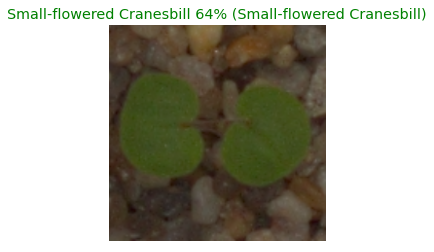

In [52]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images)

In [53]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plots the top 10 highest prediction confidences along with
  the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_seedlings[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)), 
                     top_10_pred_values, 
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

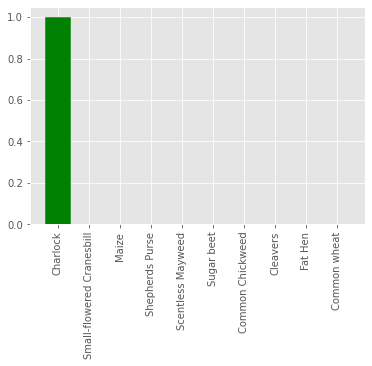

In [54]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

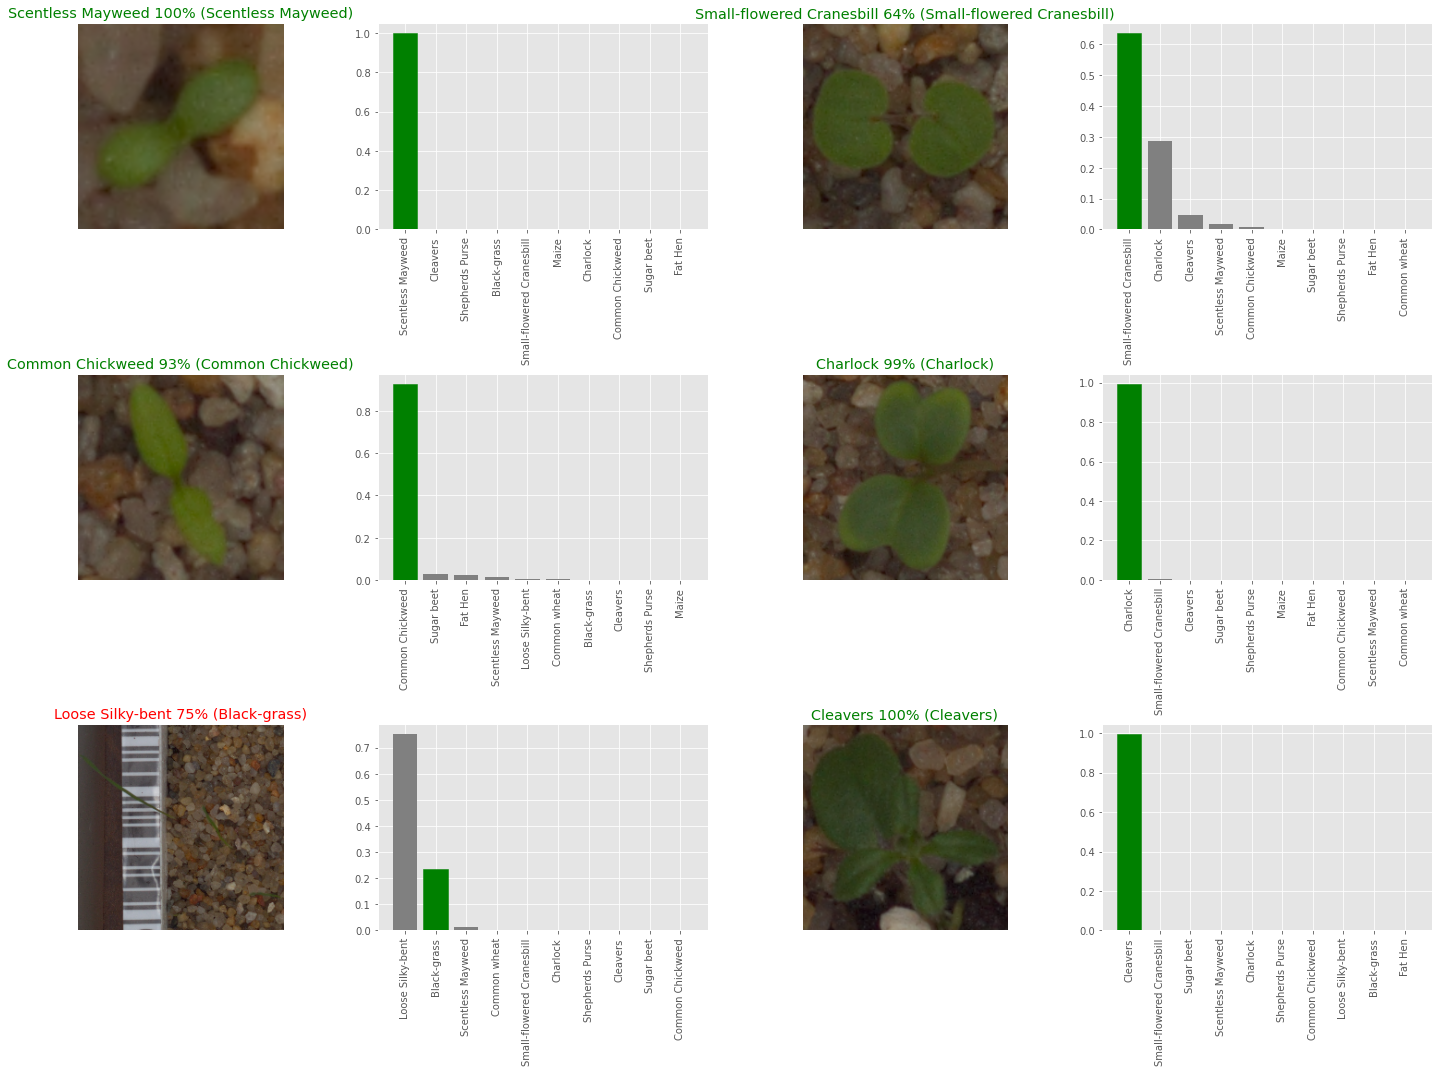

In [55]:
# Let's check a few predictions and their different values
i_multiplier = 0
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(5*2*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                labels=val_labels,
                n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()